In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [87]:
def load_all_images(path):
    images = []
    for image in glob.glob(path+"/*.jpg"):
        img = cv2.imread(image,0)
        images.append(img)
    return images

In [357]:
def image2BGR(image):
    h = image.shape[0]
    h = int(h / 3)
    b = image[:h]
    g = image[h:2*h]
    r = image[2*h:3*h]
    return(b, g, r)

In [358]:
def crop_image(image1, crop_rate=0.055):
    w1 = int(image1.shape[0]*crop_rate)
    w2 = int(image1.shape[0] - image1.shape[0]*crop_rate)
    h1 = int(image1.shape[1]* crop_rate)
    h2 = int(image1.shape[1] - image1.shape[1]*crop_rate)
    
    return image1[w1:w2,h1:h2]

In [359]:
def score(image1, image2):
    return np.sum(np.sum((image1-image2)**2))

In [381]:
def align_images(image1, image2, align_point = [15, 15]):
    min_score = float('inf')
    point = []
    
    pointX_list = np.arange(-align_point[0], align_point[0])
    pointY_list = np.arange(-align_point[1], align_point[1])
    
    image1 = cv2.Sobel(image1, cv2.CV_64F, 0, 1, ksize=5)
    image2 = cv2.Sobel(image2, cv2.CV_64F, 0, 1, ksize=5)
    
    for x in pointX_list:
        for y in pointY_list:
            shifted_image2 = np.roll(image2, [x, y], axis=(0,1))
            new_score = score(image1, shifted_image2)
            if(new_score <= min_score):
                min_score = new_score
                point = [x, y]
    return point

In [382]:
images = load_all_images("original_images")

In [401]:
b,g,r = image2BGR(images[2])

b = crop_image(b)
g = crop_image(g)
r = crop_image(r)

In [402]:
br = align_images(b, r)
bg = align_images(b, g)

In [403]:
print(br)
print(bg)

[4, 5]
[3, 3]


In [404]:
new_g = np.roll(g, bg, axis = (0,1))
new_r = np.roll(r, br, axis = (0,1))

In [405]:
rgb = np.dstack([new_r, new_g, b])

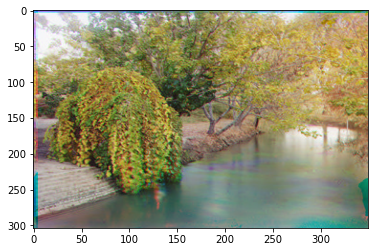

In [406]:
plt.imshow(rgb, aspect = 'auto')